# Main

 THis analysis is for *Victoria*

## Filter times

In [31]:
import matplotlib
matplotlib.use('Agg')

/home/peterad/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/peterad/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/peterad/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/peterad/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  Fi

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import ancil_load
import datetime as dt
import ancil_graph
ancil_load=reload(ancil_load)
ancil_graph=reload(ancil_graph)

In [7]:
# the better way   # data probelm goes from half hours to hours
df_all,price = ancil_load.VIC_lilly_production_price()
price=price.loc[dt.datetime(2017,1,1):dt.datetime(2018,1,1)]
price=price.iloc[::2]
df_all=df_all.iloc[1:,:]

ftimes,fprice = ancil_load.subset_pricefilter(price)
filtered_times = ftimes

## Construct plots

In [13]:
Gen_info=pd.read_excel("/mnt/y/Code/Dev/graph/MacBank/NEM Registration and Exemption List.xls",sheet_name="Generators and Scheduled Loads")
# Read Trading prices info
df_all=pd.read_csv("/mnt/y/Data/Electricity/Average_prices/df_all_VIC_PUBLIC_DVD_TRADING_PRICE.csv",index_col="SETTLEMENTDATE")
df_all=df_all.set_index(pd.DatetimeIndex(df_all.index))

price=df_all["VIC"]
price=price.dropna()

In [87]:
### 1.0 MST
### 1.1 Analytics
### 2. Wind and temp
### 3. Solar?

### 1. MST  NB Note Value factor needs to be passed in a unfiltered price!

In [5]:
import ancil_graph
import ancil_load
import pandas as pd
ancil_graph=reload(ancil_graph)
ancil_load=reload(ancil_load)

In [8]:
# Critical step due to time indexing death
df_all.index=pd.date_range(start=dt.datetime(2008,1,1,1),end=dt.datetime(2017,12,31,23),freq="H")

In [11]:
import matplotlib.pyplot as plt
plt.ioff()

In [20]:
# STEP1 MST maker

# base file name
basefn="/mnt/y/Data/Weather/ECMWF/Data_R/ml/{0}/{1:02d}/era5_hourly_ml_AUS_{0}{1:02d}.nc"

# loop over all extreme times
for i,tm in enumerate(filtered_times):

    tstart=tm - dt.timedelta(days=1)
    tstart2=tm + dt.timedelta(days=1)

    year  =  tm.year
    month =  tm.month
    day   =  tm.day
    hour  =  tm.hour
    rrp   =  fprice[i]

    # saving plots here
    outpath="/mnt/y/Code/Analysis/graph/Graph_figures/EVENTbased/Victoria_project98/"

    # load generators
#     df_all = pd.read_csv("/mnt/y/Data/Power/ECMWF/lillypond/future_wind.csv")
#     df_all=df_all.drop("time",axis=1)
#     df_all=df_all.drop("Unnamed: 0",axis=1)
#     df_all=df_all.iloc[1:,:]
#     # the 2016-01-2 -> 2016-01-3 missing behaving going to 2016-02-02 instead so hard code dates!
#     df_all.index=pd.date_range(start=dt.datetime(2008,1,1,1),end=dt.datetime(2017,12,31,23),freq="h")

    # load generators (as above)! --- > SA wind

    # Munge creates MST plot
    # works
    #df_delta,df_revenue,G = ancil_load.munge_MST(tstart,tstart2,df_all,fprice,outpath+"MST/size_prod_color_VF_{0}_{1}.png".format(tstart,tstart2))
    # NOt tested
    df_delta,df_revenue,G = ancil_load.munge_MST(tstart,tstart2,df_all,price,outpath+"MST/size_prod_color_VF_{0}_{1}.png".format(tstart,tstart2))

    
    # STEP2 analytics.
    import matplotlib.pyplot as plt
    
    # Calculate dataframe of Analytics
    df_central=ancil_load.munge_analytics_MST(G,tstart)

    import seaborn as sns

#     f=plt.figure(figsize=(20,18))
#     f=sns.lmplot(data=df_central,x="ValueFactor",y="Degree_centrality",hue="node",fit_reg=False)
#     f.savefig(outpath+"Degree_centrality/"+"degree_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))

    
#     f=plt.figure(figsize=(20,18))
#     f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN1",hue="node",fit_reg=False)
#     f.savefig(outpath+"CBN1/"+"CBN1_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))


#     f=plt.figure(figsize=(20,18))
#     f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN2",hue="node",fit_reg=False)
#     f.savefig(outpath+"CBN2/"+"CBN2_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))


#     f=plt.figure(figsize=(20,18))
#     f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN3",hue="node",fit_reg=False)
#     f.savefig(outpath+"CBN3/"+"CBN3_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))
    
#     f=plt.figure(figsize=(20,18))
#     f=sns.lmplot(data=df_central,x="ValueFactor",y="CBS",hue="node",fit_reg=False)
#     f.savefig(outpath+"CBS/"+"CBS_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))
    
    
#     # VERY VERY OPTIONAL
    
    u,s,v=np.linalg.svd(df_delta-df_delta.mean(axis=0))
    PC1=u[:,0]
    PC2=u[:,1]
    PC3=u[:,2]
    C1=np.dot(PC1,df_delta)
    C2=np.dot(PC2,df_delta)
    C3=np.dot(PC3,df_delta)
    PCA=pd.DataFrame({"PC1":C1,"PC2":C2,"PC3":C3},index=df_delta.columns)
    PCA["gen"]=PCA.index

    # PCA1 Vs PC2
    f=plt.figure(figsize=(10,9))
    f=sns.lmplot(data=PCA,x="PC1",y="PC2",hue="gen",fit_reg=False)
    #plt.draw()
    f.savefig(outpath+"PCA1/"+"PCA1_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))

    # PCA1 VC PC3
    f=plt.figure(figsize=(10,9))
    f=sns.lmplot(data=PCA,x="PC1",y="PC3",hue="gen",fit_reg=False)
    #plt.draw()
    f.savefig(outpath+"PCA2/"+"PCA2_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))
    
    
    plt.clf()


Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Ye

Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Ye

Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Ye

Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Ye

Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Ye

Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Ye

Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Yendon)
Berrybank
Yaloak South
Ryan Corner
KIATAWF1
Ferguson
Yawong
Woolsthorpe
Cherry Tree
Rifle Butts
Hawkesdale
OAKLAND1
Crowlands
Timboon West
Mount Gellibrand
Dundonnell
Murra Warra
BALDHWF1
Mortlake South
Bulgana
Stockyard Hill
Salt Creek
MERCER01
Moorabool
ARWF1
Berrimal
MACARTH1
Lal Lal (Elaine and Ye

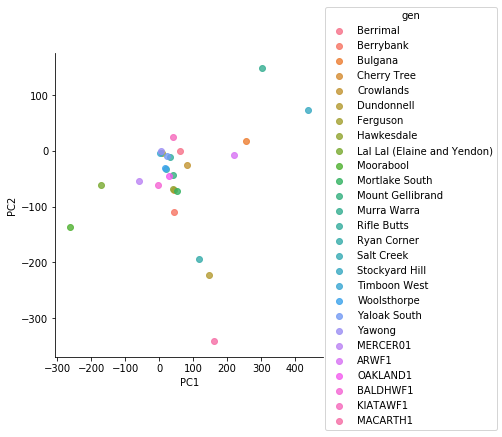

In [16]:
sns.lmplot(data=PCA,x="PC1",y="PC2",hue="gen",fit_reg=False)

In [11]:
df_central.mean(axis=0)

Degree_centrality      0.074074
Eigencentrality        0.149990
katz                   0.191605
Pagerank               0.037037
Closeness              0.192303
Clustering             0.000000
ValueFactor          115.869899
Generation            49.110113
CBN1                   0.560437
CBN2                   0.036693
CBN3                   1.768571
CBS                    0.745420
dtype: float64

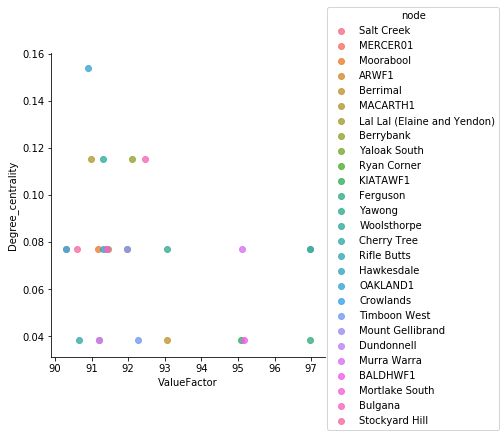

In [111]:
import seaborn as sns
# Degree_centrlaity
a=sns.lmplot(data=df_central,x="ValueFactor",y="Degree_centrality",hue="node",fit_reg=False)
#df.plot.bar(x="node",y="katz")

### 2. Wind and TEMP

In [ ]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import pandas as pd
import seaborn as sns
import ancil_load
import datetime as dt
import ancil_graph
ancil_load=reload(ancil_load)
ancil_graph=reload(ancil_graph)



# wind base name

df_all,price = ancil_load.VIC_lilly_production_price()
price=price.loc[dt.datetime(2017,1,1):dt.datetime(2018,1,1)]
price=price.iloc[::2]
df_all=df_all.iloc[1:,:]

ftimes,fprice = ancil_load.subset_pricefilter(price)
filtered_times = ftimes


ancil_load=reload(ancil_load)
basefn="/mnt/y/Data/Weather/ECMWF/Data_R/ml/{0}/{1:02d}/era5_hourly_ml_AUS_{0}{1:02d}.nc"


for i,tm in enumerate(ftimes):
    #ancil_load.Cartopy_Earth_wind(tm,"t",price[i],basefn)
    ancil_load.Cartopy_Earth_VIC(tm,"t",price[i],basefn)

### 3. TEMP

## PPTX

In [5]:
from netCDF4 import Dataset, MFDataset, num2date
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
import cartopy.crs as ccrs

import sys
import os
from cartopy.util import add_cyclic_point

# The hard part!

ImportError: No module named crs

In [2]:
x35*8*4*48

53760